In [13]:
# my custom lib
from basicModel import LeNet
from basicModel import AlexNet


from small_dataset import MNIST
from small_dataset import CIFAR10
from small_dataset import CIFAR100

In [14]:
import tensorflow as tf
tf.test.is_gpu_available()
# tf.config.list_physical_devices('GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2021-10-13 02:24:33.165578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 2851 MB memory:  -> device: 0, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:04:00.0, compute capability: 6.1
2021-10-13 02:24:33.167535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:1 with 2851 MB memory:  -> device: 1, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:05:00.0, compute capability: 6.1
2021-10-13 02:24:33.169401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:2 with 2849 MB memory:  -> device: 2, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:08:00.0, compute capability: 6.1
2021-10-13 02:24:33.171277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:3 with 2849 MB memory:  -> device: 3, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:09:00.0, compute capability: 6.1
2021-10-13 02:24:33.173132: I tensorflow/core/common_runtime/gpu/gpu_device.

True

cc:1510] Created device /device:GPU:5 with 2849 MB memory:  -> device: 5, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:86:00.0, compute capability: 6.1
2021-10-13 02:24:33.176790: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:6 with 2851 MB memory:  -> device: 6, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:89:00.0, compute capability: 6.1
2021-10-13 02:24:33.178656: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:7 with 2851 MB memory:  -> device: 7, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:8a:00.0, compute capability: 6.1


In [2]:
dataset = CIFAR10(info=True).addChannel().tocategorical().Done()

dataset: 
    使用 tensorflow.keras 取得的 CIFAR10 資料集(https://keras.io/api/datasets/cifar10/) 

    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 

    There are 50000 training images and 10000 test images.
     

one-hot encoder:
	index: 0 ,pre: [6] ,after:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
	index: 0 ,pre: [3] ,after:[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
----------
train_x:(50000, 32, 32, 3) 
train_y:(50000, 10) 
test_x:(10000, 32, 32, 3) 
test_y:(10000, 10)


In [15]:
import tensorflow as tf

#取得模型架構
MyNet = AlexNet(datasetName=dataset.className,input_shape=(32,32,3) ,classes=len(dataset.train_y[0]))


Model: "frank_AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
resizing_2 (Resizing)        (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 256)     

In [4]:
initial_learning_rate = 1e-6
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

#訓練
# compile  #在每層 layer 和 compile 都可自動尋找超參數

MyNet.model.compile(
    #learning_rate=0.01
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=1e-09),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

# fit
history  = \
MyNet.model.fit(
    x = dataset.train_x,
    y = dataset.train_y,
    epochs = 100,
    batch_size = 64,
    validation_data = (dataset.test_x ,dataset.test_y)
)


2021-10-13 01:34:56.765085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-10-13 01:34:58.245058: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


782/782 [==============================] - 25s 28ms/step - loss: 2.2256 - accuracy: 0.1678 - val_loss: 2.0205 - val_accuracy: 0.2910
Epoch 2/100
782/782 [==============================] - 21s 27ms/step - loss: 1.9837 - accuracy: 0.2639 - val_loss: 1.8187 - val_accuracy: 0.3530
Epoch 3/100
782/782 [==============================] - 22s 28ms/step - loss: 1.8450 - accuracy: 0.3134 - val_loss: 1.7002 - val_accuracy: 0.3935
Epoch 4/100
782/782 [==============================] - 22s 28ms/step - loss: 1.7411 - accuracy: 0.3497 - val_loss: 1.6058 - val_accuracy: 0.4243
Epoch 5/100
782/782 [==============================] - 22s 28ms/step - loss: 1.6543 - accuracy: 0.3839 - val_loss: 1.5313 - val_accuracy: 0.4515
Epoch 6/100
782/782 [==============================] - 22s 28ms/step - loss: 1.5889 - accuracy: 0.4091 - val_loss: 1.4748 - val_accuracy: 0.4630
Epoch 7/100
782/782 [==============================] - 22s 28ms/step - loss: 1.5332 - accuracy: 0.4346 - val_loss: 1.4277 - val_accuracy: 0.48

In [10]:
#取得訓練結果
#   save the entire model as a single file
#   model = keras.models.load_model("path_to_my_model")
# model.save(f"{save_model_dir}")
MyNet.outputHelper.saveModel()

INFO:tensorflow:Assets written to: ./result/frank_AlexNet/CIFAR10/2021-10-13 02:20:02/model/assets
saveModel... Done


In [17]:
history.history

{'loss': [2.2255520820617676,
  1.9836751222610474,
  1.8450367450714111,
  1.7410557270050049,
  1.654253602027893,
  1.58892822265625,
  1.5331717729568481,
  1.4870978593826294,
  1.4493645429611206,
  1.4108284711837769,
  1.3802162408828735,
  1.3542932271957397,
  1.32827889919281,
  1.30370032787323,
  1.2827106714248657,
  1.2626243829727173,
  1.244078516960144,
  1.226934790611267,
  1.207912802696228,
  1.1905367374420166,
  1.1807632446289062,
  1.1648192405700684,
  1.1519652605056763,
  1.1404800415039062,
  1.128990650177002,
  1.1163259744644165,
  1.1037863492965698,
  1.0971717834472656,
  1.0851019620895386,
  1.0806281566619873,
  1.0704725980758667,
  1.0634857416152954,
  1.0555565357208252,
  1.0465997457504272,
  1.0391113758087158,
  1.0327526330947876,
  1.0283869504928589,
  1.0188812017440796,
  1.0171078443527222,
  1.0128209590911865,
  1.0082406997680664,
  1.0017788410186768,
  0.9947259426116943,
  0.993959903717041,
  0.9878193140029907,
  0.9846231937

NameError: name 'sys' is not defined

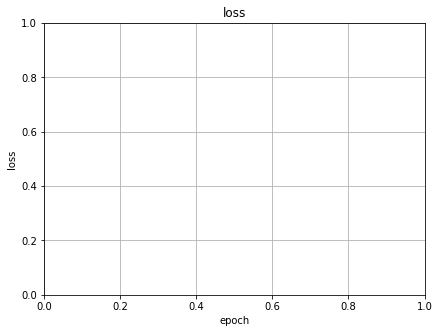

In [16]:
# print(history.history)
r = history.history
MyNet.outputHelper.drawTrainProcess(r)